In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('F:/Pranjali/FLIP ROBO_Internship/Time Series/Time Series_Admin/time_Series.csv')

In [7]:
df.head()

,YrSold,SalePrice
0,2008,208500.0
1,2007,181500.0
2,2008,223500.0
3,2006,140000.0
4,2008,250000.0


In [8]:
df.tail()

,YrSold,SalePrice
2914,2006,NaN
2915,2006,NaN
2916,2006,NaN
2917,2006,NaN
2918,2006,NaN


# Step 1. View dataset 

In [10]:
df.shape

(2919, 2)

In [11]:
df.describe()

,YrSold,SalePrice
count,2919.000000,1460.000000
mean,2007.792737,180921.195890
std,1.314964,79442.502883
min,2006.000000,34900.000000
25%,2007.000000,129975.000000
50%,2008.000000,163000.000000
75%,2009.000000,214000.000000
max,2010.000000,755000.000000


In [12]:
df.set_index('YrSold',inplace=True)

In [13]:
df.head()

,SalePrice
YrSold,
2008,208500.0
2007,181500.0
2008,223500.0
2006,140000.0
2008,250000.0


# Step2.Data Visualization

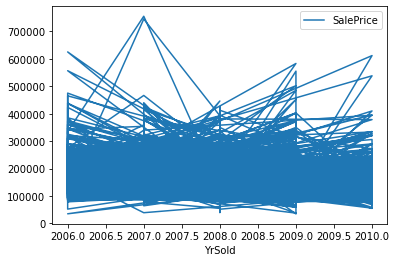

In [14]:
df.plot()

It seems that data is irregular

In [15]:
# Check if data is stationary or not
# Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [17]:
# test_result=adfuller(df['SalePrice']) # adfuller give us 5 values

In [19]:
  # just showing the ouput of test_result
#print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

In [35]:
df1=df.dropna()

In [36]:
df1.tail()

,SalePrice
YrSold,
2007,175000.0
2010,210000.0
2010,266500.0
2010,142125.0
2008,147500.0


In [37]:
df1.shape

(1460, 1)

# Differencing

In [38]:
df1['Sales First Difference'] = df1['SalePrice'] - df1['SalePrice'].shift(1)

<ipython-input-38-02e006b1dac4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sales First Difference'] = df1['SalePrice'] - df1['SalePrice'].shift(1)


In [39]:
df1['SalePrice'].shift(1).head() # its shift one down

YrSold
2008         NaN
2007    208500.0
2008    181500.0
2006    223500.0
2008    140000.0
Name: SalePrice, dtype: float64

In [40]:
df1['Irregular First Difference'] = df1['SalePrice'] - df1['SalePrice'].shift(5)
#as seasonal its a 5 year data

<ipython-input-40-8712b9ec777b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Irregular First Difference'] = df1['SalePrice'] - df1['SalePrice'].shift(5)


In [41]:
df1.tail(10) #when subtracted with nan we get a nan

,SalePrice,Sales First Difference,Irregular First Difference
YrSold,,,
2009,136000.0,44000.0,7000.0
2009,287090.0,151090.0,129190.0
2006,145000.0,-142090.0,-95000.0
2006,84500.0,-60500.0,-27500.0
2009,185000.0,100500.0,93000.0
2007,175000.0,-10000.0,39000.0
2010,210000.0,35000.0,-77090.0
2010,266500.0,56500.0,121500.0
2010,142125.0,-124375.0,57625.0


Checking data is stationary or not using null hypothesis

In [44]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [45]:
adfuller_test(df1['SalePrice'])

ADF Test Statistic : -38.22369849324309
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1459
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [46]:
## Again test dickey fuller test
adfuller_test(df1['Irregular First Difference'].dropna())

ADF Test Statistic : -13.540960939273711
p-value : 2.5137946257022217e-25
#Lags Used : 24
Number of Observations Used : 1430
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


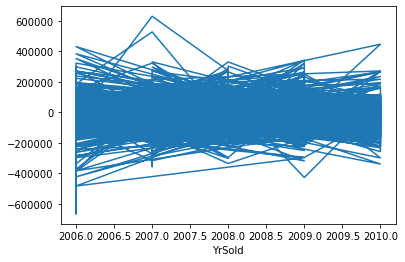

In [47]:
df1['Irregular First Difference'].plot()

# Auto Regressive Model

In [50]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# Usually in seasonal data we avoid arima ,just showing u how to impliment
from statsmodels.tsa.arima_model import ARIMA

In [51]:
model=ARIMA(df1['SalePrice'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [52]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.SalePrice   No. Observations:                 1459
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18535.112
Method:                       css-mle   S.D. of innovations          79423.301
Date:                Fri, 16 Oct 2020   AIC                          37078.224
Time:                        20:42:35   BIC                          37099.366
Sample:                             1   HQIC                         37086.111
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.1305      4.926     -0.839      0.402     -13.785       5.524
ar.L1.D.SalePrice    -0.0012      0.026     -0.045      0.964      -0.053       0.050
ma.L1.D.SalePrice    -1.0000      0.002   -522.012      0.000      -1.004      -0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -844.5112           +0.0000j          844.5112            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

As data is stationary,no further time series technique need to apply.